In [2]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.6.0")
# uncomment to force package installation and precompilation
# github_project("QuantEcon/quantecon-notebooks-julia", version="0.6.0", instantiate=true, precompile = true)

Activated /Users/yurimatsumura/QuantEcon with Julia/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.6.0


In [5]:
using LinearAlgebra, Statistics
using DataFrames, RDatasets, DataFramesMeta, CategoricalArrays, Query, VegaLite
using GLM

┌ Info: Precompiling DataFramesMeta [1313f7d8-7da2-5740-9ea0-a2ca25f37964]
└ @ Base loading.jl:1260
┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1260
┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1260
┌ Info: Precompiling GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]
└ @ Base loading.jl:1260


In [1]:
using DataFrames, RDatasets  # RDatasets provides good standard data examples from R

# note use of missing
commodities = ["crude", "gas", "gold", "silver"]
last_price = [4.2, 11.3, 12.1, missing]
df = DataFrame(commod = commodities, price = last_price)

,commod,price
,String,Float64⍰
1,crude,4.2
2,gas,11.3
3,gold,12.1
4,silver,missing


In [ ]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.6.0")
# uncomment to force package installation and precompilation
# github_project("QuantEcon/quantecon-notebooks-julia", version="0.6.0", instantiate=true, precompile = true)
using LinearAlgebra, Statistics
using ForwardDiff, Zygote, Optim, JuMP, Ipopt, BlackBoxOptim, Roots, NLsolve, LeastSquaresOptim
using Optim: converged, maximum, maximizer, minimizer, iterations #some extra function

Activated /Users/yurimatsumura/QuantEcon with Julia/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.6.0


┌ Info: Precompiling Zygote [e88e6eb3-aa80-5325-afca-941959d7151f]
└ @ Base loading.jl:1260
┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1260
┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1260


In [2]:
using ForwardDiff
h(x) = sin(x[1]) + x[1] * x[2] + sinh(x[1] * x[2])
x = [1.4,2.2]
@show ForwardDiff.gradient(h,x);

ForwardDiff.gradient(h, x) = [26.354764961030977, 16.663053156992284]


In [3]:
function squareroot(x) #pretending we don't know sqrt()
    z = copy(x) # Initial starting point for Newton’s method
    while abs(z*z - x) > 1e-13
        z = z - (z*z-x)/(2z)
    end
    return z
end
squareroot(2.0)


dsqrt(x) = ForwardDiff.derivative(squareroot, x)
dsqrt(2.0)

0.35355339059327373

In [4]:
using Zygote

h(x, y) = 3x^2 + 2x + 1 + y*x - y
gradient(h, 3.0, 5.0)

(25.0, 2.0)

In [5]:
using Optim
using Optim: converged, maximum, maximizer, minimizer, iterations #some extra functions

result = optimize(x-> x^2, -2.0, 1.0)

Results of Optimization Algorithm
 * Algorithm: Brent's Method
 * Search Interval: [-2.000000, 1.000000]
 * Minimizer: 0.000000e+00
 * Minimum: 0.000000e+00
 * Iterations: 5
 * Convergence: max(|x - x_upper|, |x - x_lower|) <= 2*(1.5e-08*|x|+2.2e-16): true
 * Objective Function Calls: 6

In [6]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x_iv = [0.0, 0.0]
results = optimize(f, x_iv) # i.e. optimize(f, x_iv, NelderMead())

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00]
    Minimum:   3.525527e-09

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    60
    f(x) calls:    118


In [8]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x_iv = [0.0, 0.0]
results = optimize(f, x_iv, LBFGS()) # i.e. optimize(f, x_iv, NelderMead())

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00]
    Minimum:   5.378388e-17

 * Found with
    Algorithm:     L-BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 4.54e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.54e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.85e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.30e-03 ≰ 0.0e+00
    |g(x)|                 = 9.88e-14 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    24
    f(x) calls:    67
    ∇f(x) calls:   67


In [10]:
x_iv = [0.0, 0.0]
results = optimize(f, x_iv, LBFGS(), autodiff=:forward) # i.e. use ForwardDiff.jl


 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00]
    Minimum:   5.191703e-27

 * Found with
    Algorithm:     L-BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 4.58e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.58e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.41e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.50e+07 ≰ 0.0e+00
    |g(x)|                 = 1.44e-13 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    24
    f(x) calls:    67
    ∇f(x) calls:   67


In [11]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
x_iv = [0.0, 0.0]
function g!(G, x)
    G[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
    G[2] = 200.0 * (x[2] - x[1]^2)
end

results = optimize(f, g!, x_iv, LBFGS()) # or ConjugateGradient()

 * Status: success

 * Candidate solution
    Minimizer: [1.00e+00, 1.00e+00]
    Minimum:   5.191703e-27

 * Found with
    Algorithm:     L-BFGS
    Initial Point: [0.00e+00, 0.00e+00]

 * Convergence measures
    |x - x'|               = 4.58e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.58e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.41e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.50e+07 ≰ 0.0e+00
    |g(x)|                 = 1.44e-13 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    24
    f(x) calls:    67
    ∇f(x) calls:   67


In [16]:
# min (1-x)^2 + 100(y-x^2)^2)
# st x + y >= 10

using JuMP,Ipopt
m = Model(with_optimizer(Ipopt.Optimizer)) # settings for the solver
@variable(m, x, start = 0.0)
@variable(m, y, start = 0.0)

@NLobjective(m, Min, (1-x)^2 + 100(y-x^2)^2)

JuMP.optimize!(m)
println("x = ", value(x), " y = ", value(y))

# adding a (linear) constraint
@constraint(m, x + y == 10)
JuMP.optimize!(m)
println("x = ", value(x), " y = ", value(y))

┌ Warning: `with_optimizer` is deprecated. Adapt the following example to update your code:
│ `with_optimizer(Ipopt.Optimizer)` becomes `Ipopt.Optimizer`.
│   caller = top-level scope at In[16]:5
└ @ Core In[16]:5


This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [17]:
using BlackBoxOptim

function rosenbrock2d(x)
return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end

results = bboptimize(rosenbrock2d; SearchRange = (-5.0, 5.0), NumDimensions = 2);

┌ Info: Precompiling BlackBoxOptim [a134a8b2-14d6-55f6-9291-3336d3ab0209]
└ @ Base loading.jl:1260


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 0.13 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 77763.44
Function evals per second = 78502.12
Improvements/step = 0.20040
Total function evaluations = 10096


Best candidate found: [1.0, 1.0]

Fitness: 0.000000000



In [18]:
using LeastSquaresOptim
function rosenbrock(x)
    [1 - x[1], 100 * (x[2]-x[1]^2)]
end
LeastSquaresOptim.optimize(rosenbrock, zeros(2), Dogleg())

┌ Info: Precompiling LeastSquaresOptim [0fc2ff8b-aaa3-5acd-a817-1944a5e08891]
└ @ Base loading.jl:1260


Results of Optimization Algorithm
 * Algorithm: Dogleg
 * Minimizer: [1.0,1.0]
 * Sum of squares at Minimum: 0.000000
 * Iterations: 51
 * Convergence: true
 * |x - x'| < 1.0e-08: false
 * |f(x) - f(x')| / |f(x)| < 1.0e-08: true
 * |g(x)| < 1.0e-08: false
 * Function Calls: 52
 * Gradient Calls: 36
 * Multiplication Calls: 159


In [20]:
x = 3.0
f(x) = x^2
g(x) = log(x)

@show g(f(x))
@show x |> f |> g; # pipes nest function calls

g(f(x)) = 2.1972245773362196
(x |> f) |> g = 2.1972245773362196


In [22]:
using Query, DataFrames

df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])

x = @from i in df begin
    @where i.age>50
    @select {i.name, i.children}
    @collect DataFrame
end

,name,children
,String,Int64
1,Kirk,2


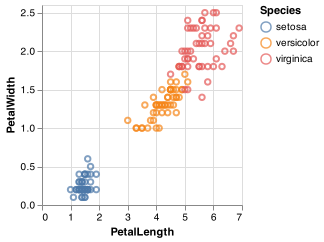

In [23]:
using RDatasets, VegaLite
iris = dataset("datasets", "iris")

iris |> @vlplot(
    :point,
    x=:PetalLength,
    y=:PetalWidth,
    color=:Species
)

In [24]:
using GLM

x = randn(100)
y = 0.9 .* x + 0.5 * rand(100)
df = DataFrame(x=x, y=y)
ols = lm(@formula(y ~ x), df) # R-style notation

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + x

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.256986   0.0149723  17.1641    <1e-30   0.227274   0.286698
x            0.891689   0.0152882  58.3254    <1e-77   0.861351   0.922028
──────────────────────────────────────────────────────────────────────────

In [25]:
using RegressionTables
regtable(ols)
# regtable(ols,  renderSettings = latexOutput()) # for LaTex output

┌ Info: Precompiling RegressionTables [d519eb52-b820-54da-95a6-98e1306fdade]
└ @ Base loading.jl:1260



----------------------
                  y   
              --------
                   (1)
----------------------
(Intercept)   0.257***
               (0.015)
x             0.892***
               (0.015)
----------------------
Estimator          OLS
----------------------
N                  100
R2               0.972
----------------------




In [26]:
using FixedEffectModels
cigar = dataset("plm", "Cigar")
cigar.StateCategorical =  categorical(cigar.State)
cigar.YearCategorical =  categorical(cigar.Year)
fixedeffectresults = reg(cigar, @formula(Sales ~ NDI + fe(StateCategorical) + fe(YearCategorical)),
                            weights = :Pop, Vcov.cluster(:State))
regtable(fixedeffectresults)


----------------------------
                     Sales  
                   ---------
                         (1)
----------------------------
NDI                -0.005***
                     (0.001)
----------------------------
StateCategorical         Yes
YearCategorical          Yes
----------------------------
Estimator                OLS
----------------------------
N                      1,380
R2                     0.803
----------------------------




In [30]:
# Exercise 1

struct DualNumber{T} <: Real
    val::T
    ϵ::T
end

import Base: +, *, -, ^, exp
+(x::DualNumber, y::DualNumber) = DualNumber(x.val + y.val, x.ϵ + y.ϵ)  # dual addition
+(x::DualNumber, a::Number) = DualNumber(x.val + a, x.ϵ)  # i.e. scalar addition, not dual
+(a::Number, x::DualNumber) = DualNumber(x.val + a, x.ϵ)  # i.e. scalar addition, not dual
*(x::DualNumber, y::DualNumber) = DualNumber(x.val * y.val, x.ϵ * y + x * y.ϵ)  
*(x::DualNumber, a::Number) = DualNumber(x.val *  a, a * x.ϵ)  
*(a::Number, x::DualNumber) = DualNumber(x.val * a, a * x.ϵ)  
-(x::DualNumber, y::DualNumber) = DualNumber(x.val - y.val, x.ϵ - y.ϵ)  
-(x::DualNumber, a::Number) = DualNumber(x.val - a, x.ϵ)  
-(a::Number, x::DualNumber) = DualNumber(x.val - a, x.ϵ)  
^(x::DualNumber, a::Number) = DualNumber(x.val^a, a*(x.val)^(a-1)*x.ϵ)  
exp(x::DualNumber) =  DualNumber(exp(x.val), exp(x.val)*x.ϵ)
exp(x::DualNumber, a::Number ) =  DualNumber(exp(a*x.val), a*exp(x.val)*x.ϵ)

exp (generic function with 20 methods)

In [31]:
f(x) = exp(2.0 * x)

x = DualNumber(2.0, 1.0)

f(x)

DualNumber{Float64}(54.598150033144236, 109.19630006628847)

54.598150033144236